In [54]:
# Optimisation and Visualisation
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/marja/Downloads/archive/retail_store_inventory.csv")

df.head()



,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [55]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [56]:
#Stock sufficiency check 

#Inventory Level per store, per product 
inventory_per_store = (
    df.groupby(['Store ID', 'Product ID'])['Inventory Level']
      .last()
      .reset_index()
)

#Demand Forecat per store, per product
forecast_demand = (
    df.groupby(['Store ID', 'Product ID'])['Demand Forecast']
      .mean()
      .reset_index()
)

#Merging results
inventory_check = inventory_per_store.merge(
    forecast_demand,
    on=['Store ID', 'Product ID']
)

#Logic - if inventory level is greater than demand forecast, stock is sufficient 
inventory_check['stock_sufficient'] = (inventory_check['Inventory Level'] >= inventory_check['Demand Forecast'])


# Quantity to cover up demand 
inventory_check['shortage_qty'] = (inventory_check['Demand Forecast'] - inventory_check['Inventory Level']).clip(lower=0)

print(inventory_check.head())


  Store ID Product ID  Inventory Level  Demand Forecast  stock_sufficient  \
0     S001      P0001              223       143.063187              True   
1     S001      P0002              217       136.417538              True   
2     S001      P0003               69       146.561204             False   
3     S001      P0004              338       146.057196              True   
4     S001      P0005              471       138.232791              True   

   shortage_qty  
0      0.000000  
1      0.000000  
2     77.561204  
3      0.000000  
4      0.000000  


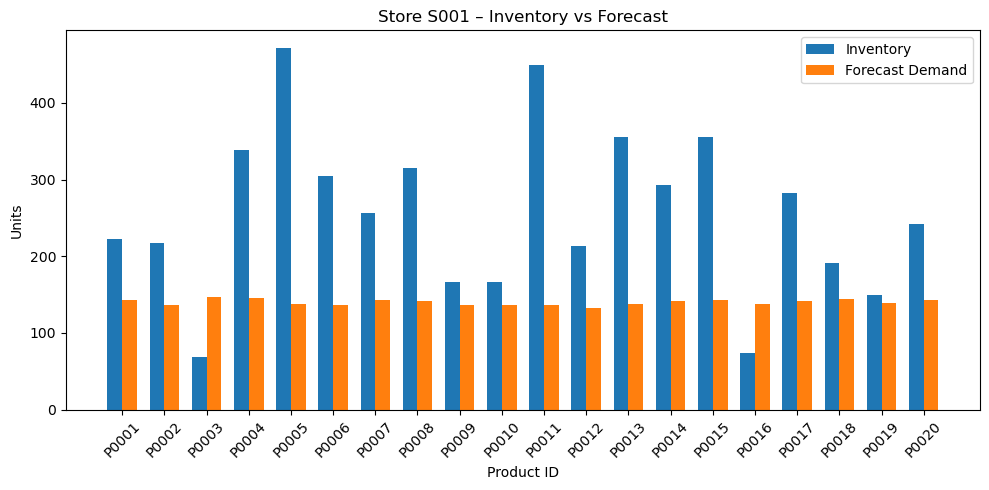

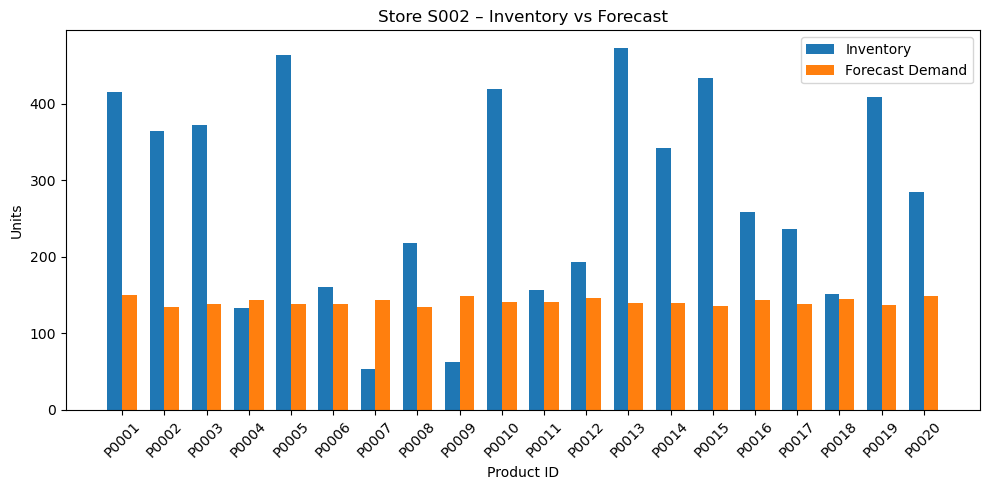

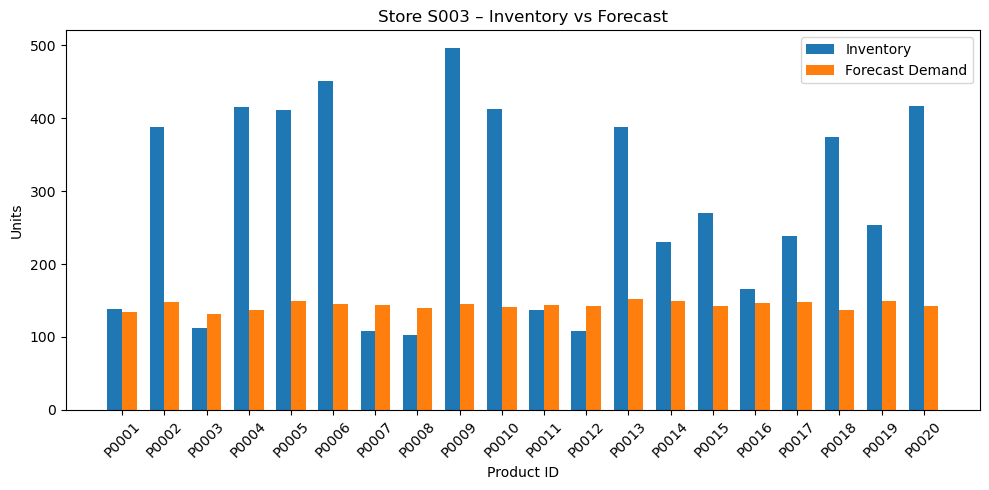

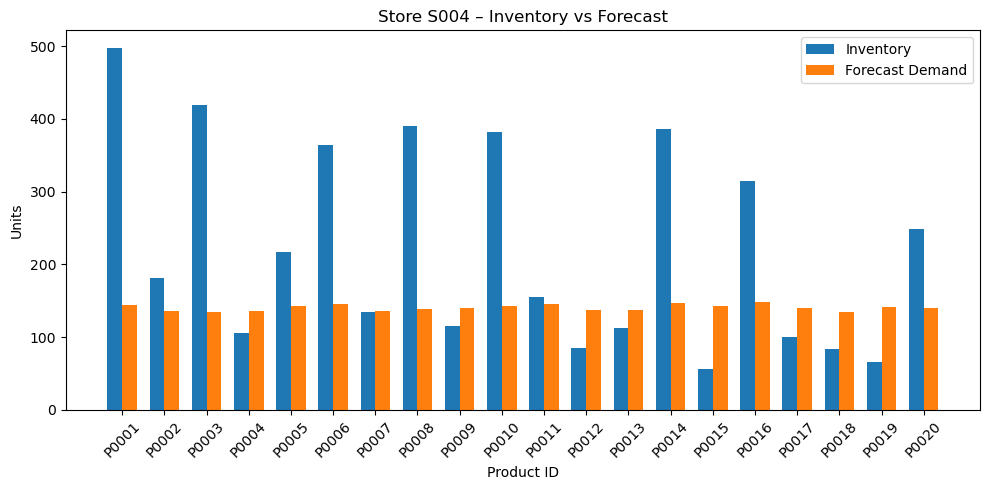

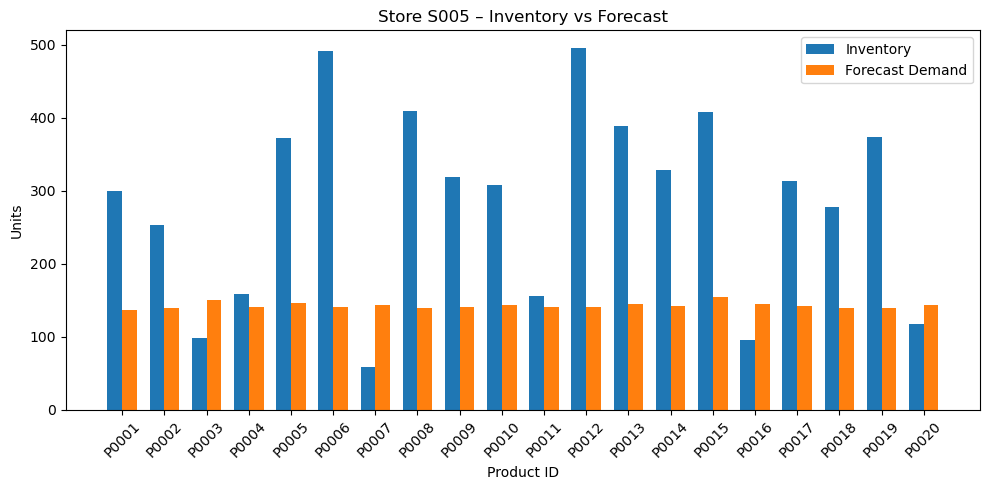

In [59]:
# Plot per store
stores = inventory_check['Store ID'].unique()

for store in stores:
    store_data = inventory_check[inventory_check['Store ID'] == store]

    x = np.arange(len(store_data['Product ID']))
    width = 0.35

    plt.figure(figsize=(10, 5))

    plt.bar(x - width/2, store_data['Inventory Level'], width, label='Inventory')
    plt.bar(x + width/2, store_data['Demand Forecast'], width, label='Forecast Demand')

    plt.xticks(x, store_data['Product ID'], rotation=45)
    plt.title(f'Store {store} – Inventory vs Forecast')
    plt.ylabel('Units')
    plt.xlabel('Product ID')
    plt.legend()

    plt.tight_layout()
    plt.show()